# Recommender systems

Recommendation is how we find what matters to us in a big, complicated world.  Let's figure out how to create an effective solution and what challenges present themselves.

## Collaborative filtering

Collaborative filtering learns latent properties of the users and the documents.  It uses these latent properties to drive recommendations.

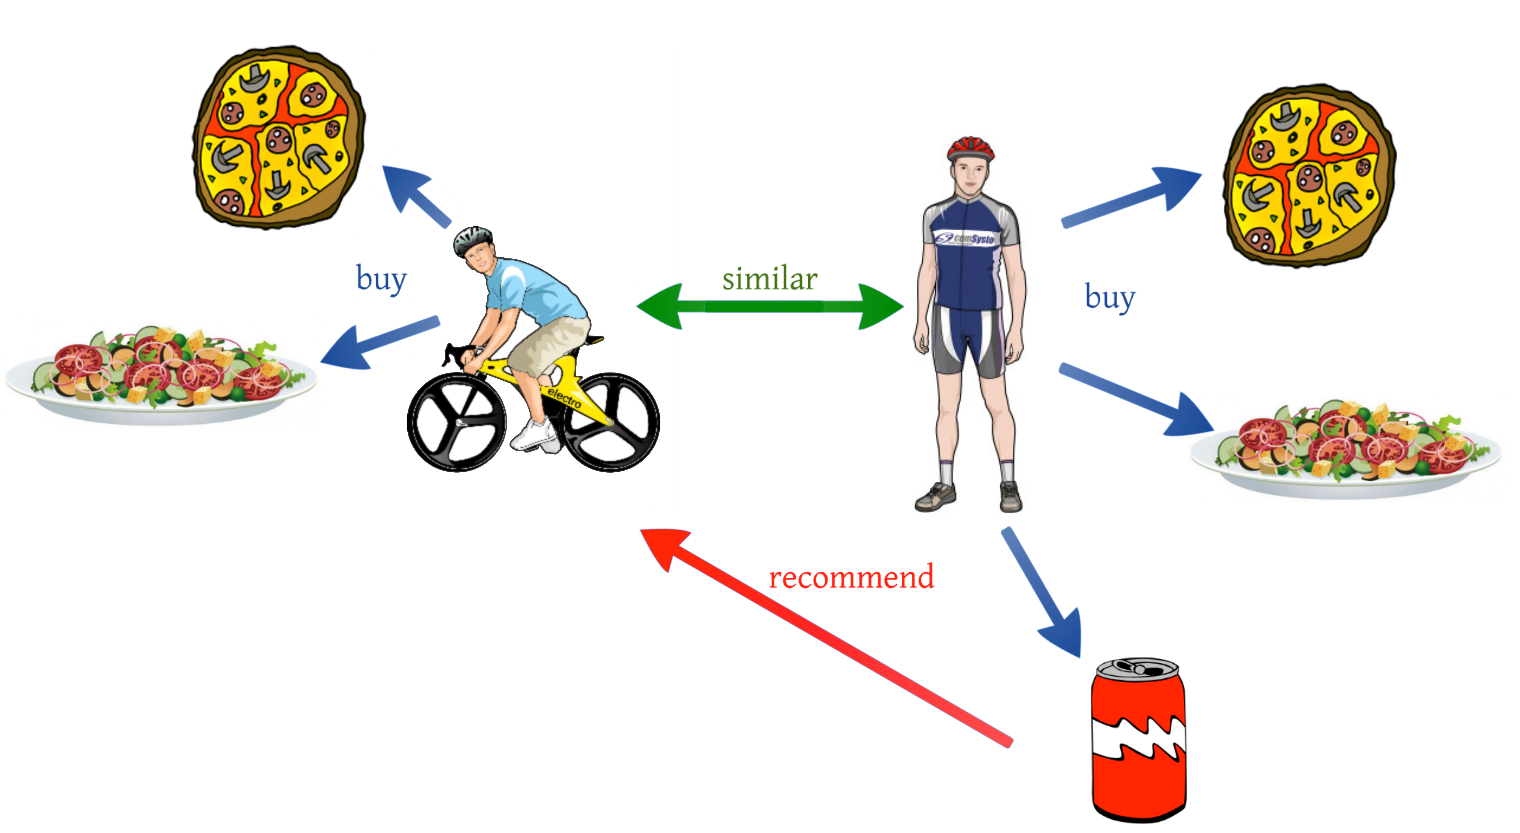

## The data

Data is collected as a series of observations from the user.  Depending on how the interface is designed, the user may supply any of a variety of data forms:

* binary classification (👍 / 👎) 
* multi-class classification (👍 / 😐 / 👎)
* discrete values (1-5 stars)
* continuous values (0.0 - 10.0 out of 10)
* multi-label classification (love 🤩, gross 🤢, overrated 😞, etc)

Taking continuous values as an example, there are two natural ways to represent and store the data: wide and long



### Wide

Ideal:
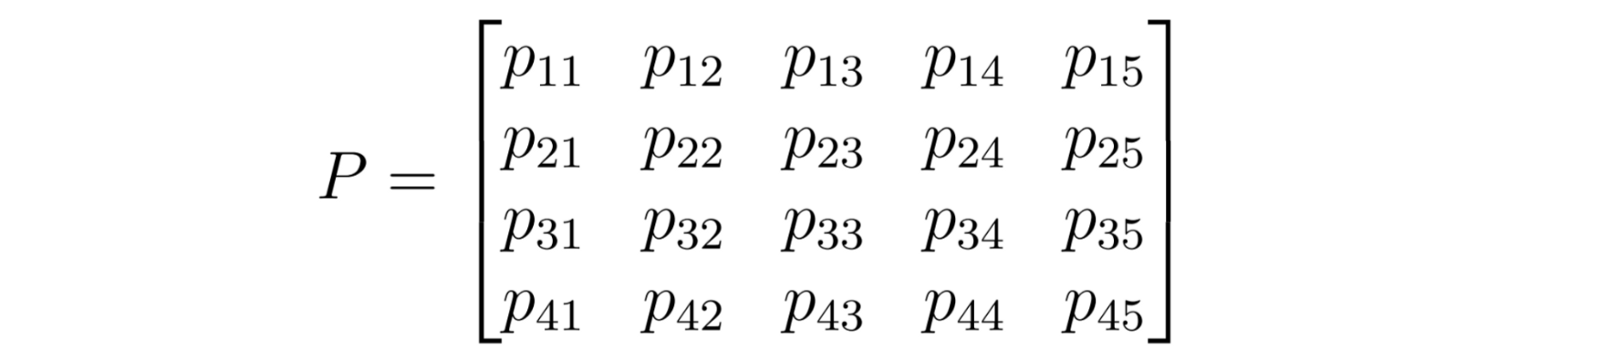

Actual:

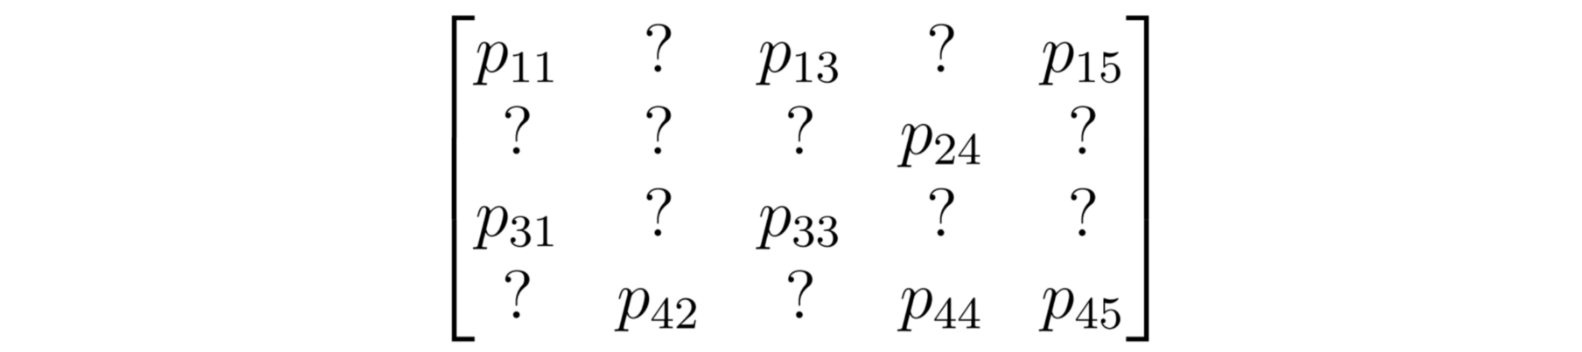

There may be thousands of documents and millions of users.  A small number of rows and columns will have a lot of data, but the norm will be only a few non-empty values per row or column.

We need to find a way to handle (very!) sparse data representations.

### Long

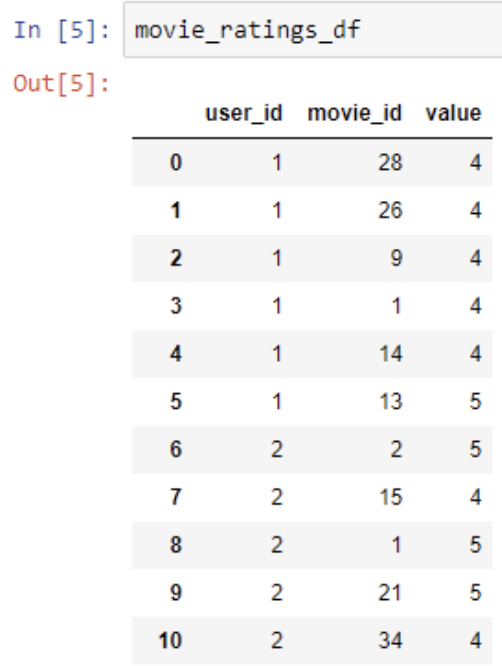


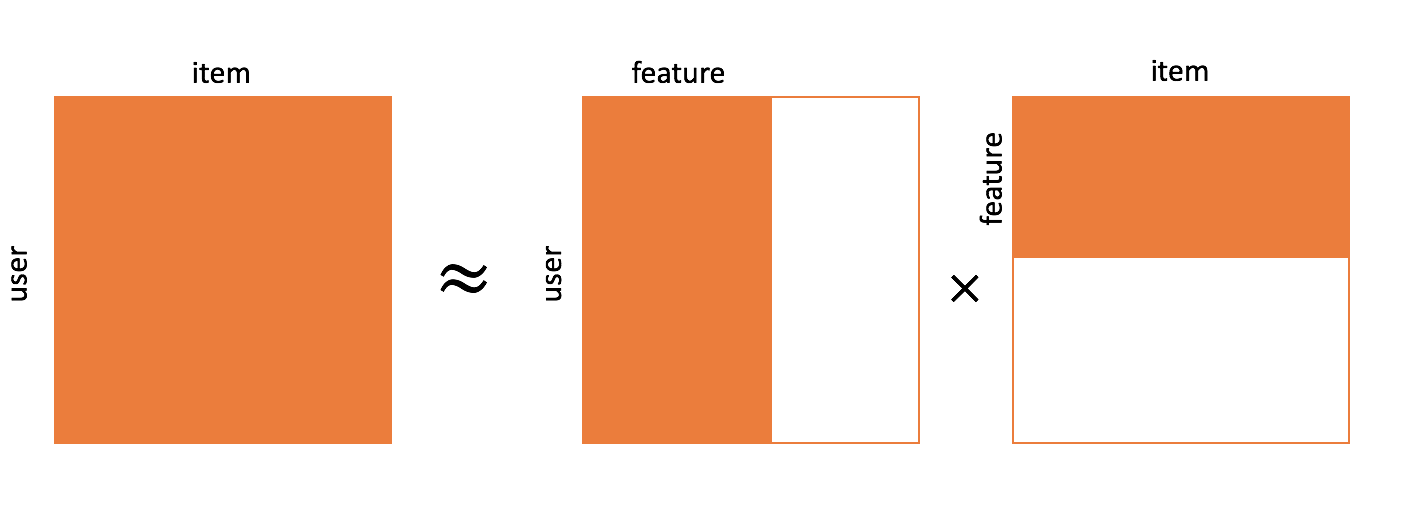

* M is the total number of users
* N is the total number of movies
* K is the total latent features


* R is MxN user-movie rating matrix
* P is MxK user-feature affinity matrix which represents the association between users and features
* Q is NxK item-feature relevance matrix which represents the association between movies and features
* Σ is KxK diagonal feature weight matrix which represents the essential weights of features

Following (i.e. stealing) this course:

https://www.coursera.org/learn/matrix-factorization/lecture/K5NBy/singular-value-decomposition

## Singular Value Decomposition (SVD)

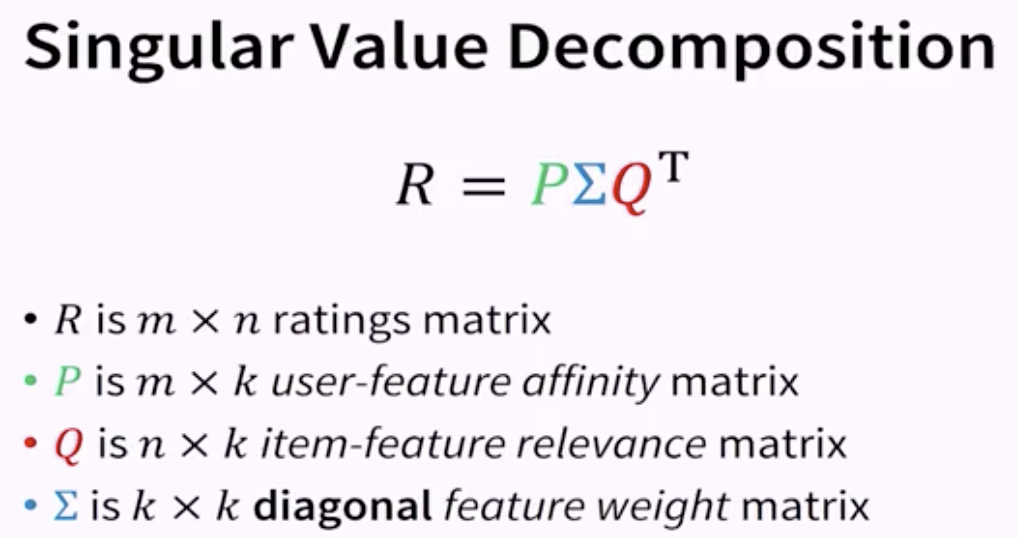

For n users and m documents.

P and Q are orthogonal.  I.e. P•Q=0.
This exists for all real matrices R.

- SVD learns latent features.

- The features are learned only from the rating data.

- The features are not interpretable.  
I.e. a single feature might be highly correlated with human-identified features (animated AND medical documentary).  Features learned will maximize predictive power from available data.

- Creates a compact representation of a shared feature space.  (Shared between users and documents).

## Calculating SVD example

Okay, so that's how we can represent the data.  Now let's look in detail at how the math works by working through the example from [here](https://www.youtube.com/watch?v=cOUTpqlX-Xs).  

N.B. the TA makes some mistakes which are (hopefully) corrected in this document.

Let's calculate the U, Σ, and V matrices for a simple example where R is a 2x2 matrix.

$$R = \left(\begin{array}{cc} 
5 & 5\\ 
-1 & 7
\end{array}\right)
$$ 

To solve, we can make use of two relationships:

$$R^T R = V \Sigma^T \Sigma V^T$$
$$R V = U \Sigma$$

Plug in and compute $$R^T R$$

$$R^T R = 
\left(\begin{array}{cc} 
5 & -1\\ 
5 & 7
\end{array}\right)
\left(\begin{array}{cc} 
5 & 5\\ 
-1 & 7
\end{array}\right) = 
\left(\begin{array}{cc} 
26 & 18\\ 
18 & 74
\end{array}\right)
$$

Σ is a diagonal matrix with decreasing values from top left to bottom right.  Since it's a diagonal matrix, this starts to look like an eigenvalue problem..

$$det(R^T R - \lambda I) = det\left(\begin{array}{cc} 
26 - \lambda & 18\\ 
18 & 74 - \lambda
\end{array}\right) = 0$$

$$0 = (26 - \lambda)(74 - \lambda) - 18^2 = \lambda^2 - 100 \lambda + 1600 = (\lambda - 80)(\lambda - 20)$$

So eigenvalues are λ = 80, 20.  Let's use these to calculate our eigenvectors.

$$\lambda_1 = 80: R^T R - \lambda I = 
\left(\begin{array}{cc} 
26 & 18\\ 
18 & 74
\end{array}\right) - 
\left(\begin{array}{cc} 
80 & 0\\ 
0 & 80
\end{array}\right) =
\left(\begin{array}{cc} 
-54 & 18\\ 
18 & -6
\end{array}\right)
$$

$$
(R^T R - \lambda I) v_1 \circeq 0
$$

$$
\hat{v_1} = \left(\begin{array}{cc} 
1 / \sqrt{10}\\
3 / \sqrt{10}
\end{array}\right)
$$

$$\lambda_2 = 20: R^T R - \lambda I = 
\left(\begin{array}{cc} 
26 & 18\\ 
18 & 74
\end{array}\right) - 
\left(\begin{array}{cc} 
20 & 0\\ 
0 & 20
\end{array}\right) =
\left(\begin{array}{cc} 
6 & 18\\ 
18 & 54
\end{array}\right)
$$

$$
(R^T R - \lambda I) v_2 \circeq 0
$$

$$
\hat{v_2} = \left(\begin{array}{cc} 
-3 / \sqrt(10)\\
1 / \sqrt(10)
\end{array}\right)
$$

Eigenvectors are the columns of V.  Σ's diagonal values are square root of eigenvalues (in decreasing order).

$$V = \left(\begin{array}{cc} 
1 / \sqrt{10} & -3 / \sqrt{10}\\
3 / \sqrt{10} & 1 / \sqrt{10}
\end{array}\right)$$


$$Σ = \left(\begin{array}{cc} 
4\sqrt{5} & 0\\ 
0 & 2\sqrt{5}
\end{array}\right)$$

Okay, we're almost done!  Now we just need to calculate U.

$$ R V = U \Sigma $$ can be rewritten as $$ R V \Sigma^{-1} = U$$

Plug in and calculate:

$$ U = 
\left(\begin{array}{cc} 
5 & 5\\ 
-1 & 7
\end{array}\right)
\left(\begin{array}{cc} 
1 / \sqrt{10} & -3 / \sqrt{10}\\
3 / \sqrt{10} & 1 / \sqrt{10}
\end{array}\right)
\left(\begin{array}{cc} 
\frac{1}{4\sqrt{5}} & 0\\ 
0 & \frac{1}{2\sqrt{5}}
\end{array}\right) =
\left(\begin{array}{cc} 
\frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}}\\ 
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{array}\right)
$$

As a sanity check, we can check it all programatically:

In [137]:
R = np.array([[ 5.,5.],
              [-1.,7.]])

sigma = np.array([[4,0],
                  [0, 2]]) * np.sqrt(5)

V = np.array([[1,-3],
              [3,1]]) / np.sqrt(10)

U = np.array([[1,-1],
              [1,1]]) / np.sqrt(2)

In [139]:
print("R:")
print(R)

print("UΣ(V.T):")
print(np.dot(np.dot(U, sigma), V.T))

R:
[[ 5.  5.]
 [-1.  7.]]
UΣ(V.T):
[[ 5.  5.]
 [-1.  7.]]


In [140]:
assert np.allclose(R, np.dot(np.dot(U, sigma), V.T))

print("Looks good!")

Looks good!


In [ ]:
Okay, so that's what it looks like with a 2x2 matrix.  So now let's do it with a matrix of user reviews per movie.

In [24]:
# To store the data
import pandas as pd

# To do linear algebra
import numpy as np

# To create plots
import matplotlib.pyplot as plt

# To create interactive plots
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# To shift lists
from collections import deque

# To compute similarities between vectors
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# To use recommender systems
import surprise as sp
from surprise.model_selection import cross_validate

# To create deep learning models
from keras.layers import Input, Embedding, Reshape, Dot, Concatenate, Dense, Dropout
from keras.models import Model

# To create sparse matrices
from scipy.sparse import coo_matrix

# To light fm
from lightfm import LightFM
from lightfm.evaluation import precision_at_k

# To stack sparse matrices
from scipy.sparse import vstack


/usr/local/lib/python3.7/site-packages/lightfm/_lightfm_fast.py:9: UserWarning:

LightFM was compiled without OpenMP support. Only a single thread will be used.



In [25]:
# Load data for all movies
movie_titles = pd.read_csv('../data/netflix-prize-data/movie_titles.csv', 
                           encoding = 'ISO-8859-1', 
                           header = None, 
                           names = ['Id', 'Year', 'Name']).set_index('Id')

print('Shape Movie-Titles:\t{}'.format(movie_titles.shape))
movie_titles.sample(5)

Shape Movie-Titles:	(17770, 2)


,Year,Name
Id,,
8594,1999.0,The Artist: Rave UN2 the Year 2000
7418,2003.0,From Justin to Kelly: The Tale of Two American...
11319,2003.0,Revenge in Olympia
16250,1990.0,Def by Temptation
10574,2004.0,The Keys to the House


In [26]:
# Load single data-file
df_raw = pd.read_csv('../data/netflix-prize-data/combined_data_1.txt', header=None, names=['User', 'Rating', 'Date'], usecols=[0, 1, 2])


# Find empty rows to slice dataframe for each movie
tmp_movies = df_raw[df_raw['Rating'].isna()]['User'].reset_index()
movie_indices = [[index, int(movie[:-1])] for index, movie in tmp_movies.values]

# Shift the movie_indices by one to get start and endpoints of all movies
shifted_movie_indices = deque(movie_indices)
shifted_movie_indices.rotate(-1)


# Gather all dataframes
user_data = []

# Iterate over all movies
for [df_id_1, movie_id], [df_id_2, next_movie_id] in zip(movie_indices, shifted_movie_indices):
    
    # Check if it is the last movie in the file
    if df_id_1<df_id_2:
        tmp_df = df_raw.loc[df_id_1+1:df_id_2-1].copy()
    else:
        tmp_df = df_raw.loc[df_id_1+1:].copy()
        
    # Create movie_id column
    tmp_df['Movie'] = movie_id
    
    # Append dataframe to list
    user_data.append(tmp_df)

# Combine all dataframes
df = pd.concat(user_data)
del user_data, df_raw, tmp_movies, tmp_df, shifted_movie_indices, movie_indices, df_id_1, movie_id, df_id_2, next_movie_id
print('Shape User-Ratings:\t{}'.format(df.shape))
df.sample(5)

Shape User-Ratings:	(24053764, 4)


,User,Rating,Date,Movie
430079,355877,3.0,2005-10-31,118
10297685,1663564,3.0,2005-08-02,2000
13835440,687762,5.0,2005-05-30,2660
4622268,1508633,3.0,2005-09-18,896
16536978,167956,3.0,2005-09-14,3198


In [54]:
df[df['Movie'] == 515]

,User,Rating,Date,Movie
2826275,2295232,1.0,2005-08-16,515
2826276,1560318,3.0,2005-10-04,515
2826277,2550394,1.0,2005-11-01,515
2826278,1502043,1.0,2005-08-15,515
2826279,1507284,1.0,2005-10-03,515
2826280,771626,1.0,2005-08-11,515
2826281,1579413,1.0,2005-09-11,515
2826282,1681087,1.0,2005-08-06,515
2826283,1227322,1.0,2005-06-14,515
2826284,525356,1.0,2005-08-10,515


In [52]:
df.groupby("Movie").aggregate("std").sort_values("Rating")

,Rating
Movie,
515,0.586493
13,0.665461
3456,0.682515
3033,0.725778
1227,0.744923
2102,0.767346
4469,0.768003
3962,0.776645
3058,0.780320
